# 4.9 Into to Data Visualization with Python

In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
df = pd.read_pickle(r'/Users/dorinasalam/Desktop/08-2023 Instacart Basket Analysis/02 Data/Prepared Data/orders_products_customer.pkl')

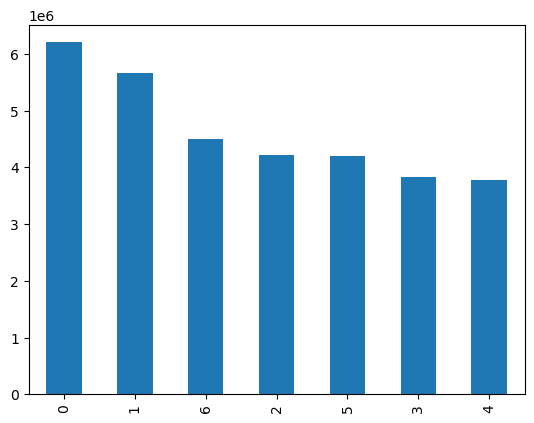

In [3]:
#Creating a bar chart
bar = df['orders_day_of_week'].value_counts().plot.bar()

In [4]:
#Saving bar chart
bar.figure.savefig(r'/Users/dorinasalam/Desktop/08-2023 Instacart Basket Analysis/04 Analysis/Visualizations/bar_orders_dow.png')

<Axes: ylabel='Frequency'>

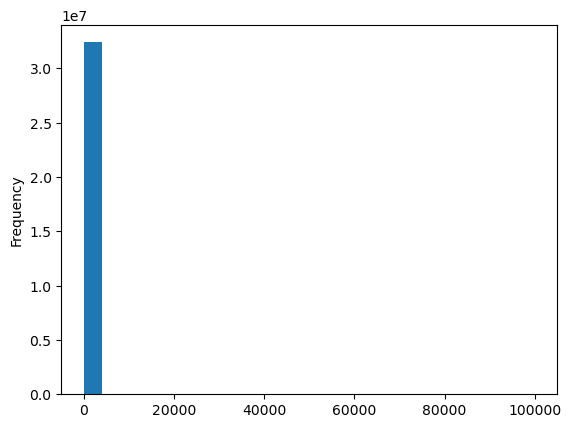

In [6]:
#Creating a histogram
df['prices'].plot.hist(bins = 25)

<Axes: xlabel='prices', ylabel='prices'>

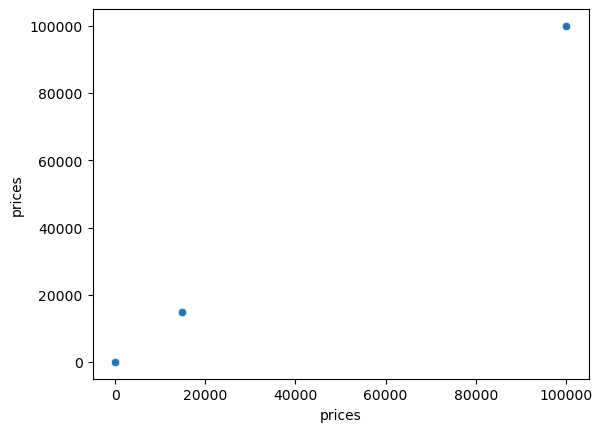

In [7]:
#Creating scatter plot to identify any outliers
sns.scatterplot(x = 'prices', y = 'prices',data = df)

In [8]:
#Identifying any products with price > 100

df.loc[df['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,_merge,price_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,mean_price,spender_flag,median_frequency,frequency_flag
13100147,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,912404,17,12,2,14,...,both,High-range product,Regularly busy,Most orders,40,Regular customer,NaN,NaN,5.0,Frequent customer
13100148,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,603376,17,22,6,16,...,both,High-range product,Regularly busy,Most orders,40,Regular customer,NaN,NaN,5.0,Frequent customer
13100149,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3264360,135,2,2,21,...,both,High-range product,Regularly busy,Average orders,4,New customer,NaN,NaN,12.0,Regular customer
13100150,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,892534,135,3,0,8,...,both,High-range product,Busiest day,Average orders,4,New customer,NaN,NaN,12.0,Regular customer
13100151,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,229704,342,8,1,19,...,both,High-range product,Very busy,Average orders,16,Regular customer,NaN,NaN,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21786876,33664,2 % Reduced Fat Milk,84,16,99999.0,2249946,204099,29,0,8,...,both,High-range product,Busiest day,Average orders,39,Regular customer,NaN,NaN,4.0,Frequent customer
21786877,33664,2 % Reduced Fat Milk,84,16,99999.0,2363282,204099,31,0,9,...,both,High-range product,Busiest day,Most orders,39,Regular customer,NaN,NaN,4.0,Frequent customer
21786878,33664,2 % Reduced Fat Milk,84,16,99999.0,3181945,204395,13,3,15,...,both,High-range product,Slightly busy,Most orders,15,Regular customer,NaN,NaN,5.0,Frequent customer
21786879,33664,2 % Reduced Fat Milk,84,16,99999.0,2486215,205227,7,3,20,...,both,High-range product,Slightly busy,Average orders,12,Regular customer,NaN,NaN,12.0,Regular customer


In [9]:
#Assigning missing values to the outliers

df.loc[df['prices'] >100, 'prices'] = np.nan

In [10]:
df['prices'].max()

25.0

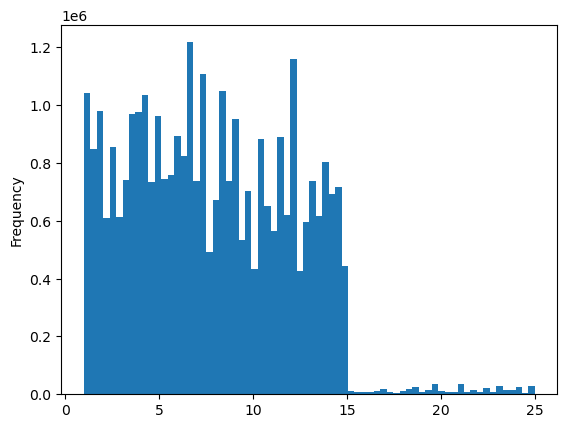

In [12]:
#Creating histogram

hist = df['prices'].plot.hist(bins = 70)

In [23]:
#Exporting histogram

hist.figure.savefig(r'/Users/dorinasalam/Desktop/08-2023 Instacart Basket Analysis/04 Analysis/Visualizations/hist_prices.png')

In [14]:
#setting the seed and creating a list holding True/False values to the test np.random.rand(len(df)) <= 0.7  

np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [16]:
#Store 70% of the sample in the df big

big = df[dev]

In [17]:
#Store 30% of the sample in the df small

small = df[~dev]

In [18]:
len(df)

32404859

In [19]:
len(big) + len(small)

32404859

In [20]:
df_2 = small[['orders_day_of_week','prices']]

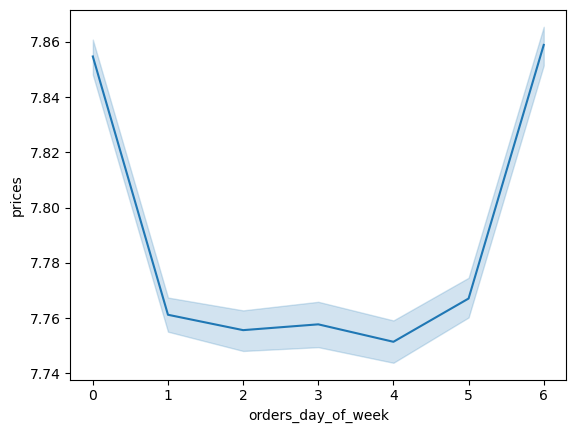

In [21]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [24]:
line.figure.savefig(r'/Users/dorinasalam/Desktop/08-2023 Instacart Basket Analysis/04 Analysis/Visualizations/line_dof_prices.png')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 23 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   product_id              int64   
 1   product_name            object  
 2   aisle_id                int64   
 3   department_id           int64   
 4   prices                  float64 
 5   order_id                int64   
 6   user_id                 int64   
 7   order_number            int64   
 8   orders_day_of_week      int64   
 9   order_hour_of_day       int64   
 10  days_since_prior_order  float64 
 11  add_to_cart_order       int64   
 12  reordered               int64   
 13  _merge                  category
 14  price_range_loc         object  
 15  busiest_day             object  
 16  busiest_period_of_day   object  
 17  max_order               int64   
 18  loyalty_flag            object  
 19  mean_price              float64 
 20  spender_flag            object  
 21  median